# Predict user car sale price

- Dataset: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

# 1. Setup

In [32]:
# imports
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split 

import pickle

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)


2.9.1


In [2]:
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

## define custom functions

In [33]:
# define base model
def baseline_model(input_dim, default_node):
    # create model
    model = Sequential()
    model.add(Dense(default_node, 
                    input_dim=input_dim, 
                    kernel_initializer='normal', 
                    activation='relu'))
    model.add(Dense(1, 
                    kernel_initializer='normal'))

    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

## load model data

In [3]:
# load car price data set 
with open('./df_model.pkl', 'rb') as handle:
    df = pickle.load(handle)
df.shape

(33956, 88)

In [4]:
# examine
df.head(2)

,price,year,classic_car,modern_car,antique_car,acura,alfa-romeo,aston-martin,audi,bmw,...,coupe,hatchback,mini-van,offroad,other_type,pickup,sedan,truck,van,wagon
21171,16990.0,2018,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21174,11975.0,2003,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#@TODO: convert to Numpy matrix 


In [ ]:
#@TODO: split train / test 


In [5]:
# split into input (X) and output (y) variables
X = df.drop(['price'], axis=1)
y = df['price']
print(X.shape, y.shape)

(33956, 87) (33956,)


In [6]:
# distribution of defaullt
y.value_counts()

24990.0    259
12995.0    251
7999.0     249
10995.0    243
8999.0     235
          ... 
13599.0      1
47998.0      1
27199.0      1
25614.0      1
15918.0      1
Name: price, Length: 3335, dtype: int64

In [7]:
y.index

Int64Index([21171, 21174, 21176, 21178, 21179, 21180, 21181, 21182, 21183,
            21185,
            ...
            71771, 71772, 71775, 71776, 71778, 71780, 71781, 71782, 71783,
            71784],
           dtype='int64', length=33956)

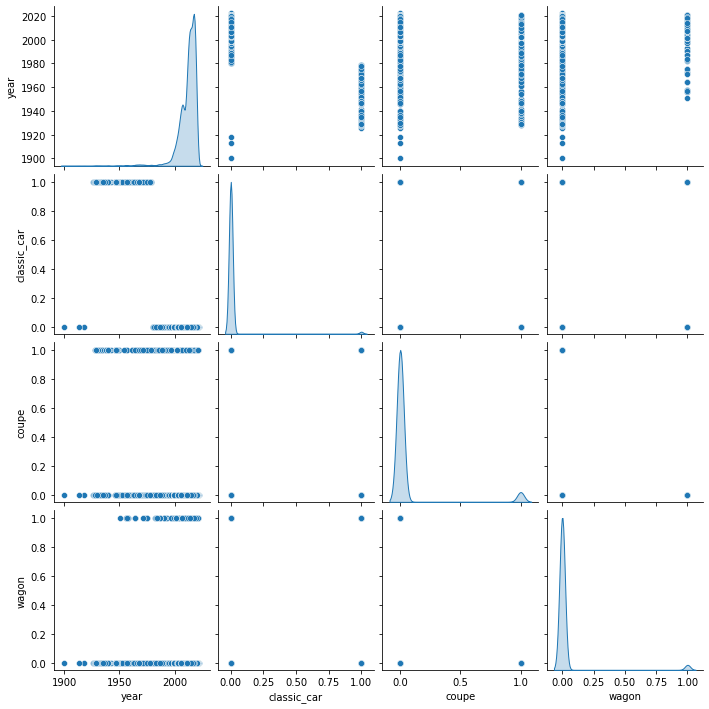

In [8]:
sns.pairplot(df[['year', 'classic_car', 'coupe', 'wagon']], diag_kind='kde')

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,33956.0,18930.331193,13327.101113,100.0,8950.0,15998.0,26590.0,99999.0
year,33956.0,2011.641242,8.531069,1900.0,2008.0,2014.0,2017.0,2022.0
classic_car,33956.0,0.013694,0.116220,0.0,0.0,0.0,0.0,1.0
modern_car,33956.0,0.986217,0.116589,0.0,1.0,1.0,1.0,1.0
antique_car,33956.0,0.000088,0.009399,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
pickup,33956.0,0.128932,0.335129,0.0,0.0,0.0,0.0,1.0
sedan,33956.0,0.303275,0.459680,0.0,0.0,0.0,1.0,1.0
truck,33956.0,0.070179,0.255452,0.0,0.0,0.0,0.0,1.0
van,33956.0,0.027094,0.162359,0.0,0.0,0.0,0.0,1.0


In [10]:
df.describe().transpose()[['mean', 'std']]

,mean,std
price,18930.331193,13327.101113
year,2011.641242,8.531069
classic_car,0.013694,0.116220
modern_car,0.986217,0.116589
antique_car,0.000088,0.009399
...,...,...
pickup,0.128932,0.335129
sedan,0.303275,0.459680
truck,0.070179,0.255452
van,0.027094,0.162359


# 2. Define Keras Model

In [11]:
# keras has two APIs: Sequential and Functional.
model = Sequential()

In [12]:
# input layer
model.add(Dense(87, input_dim=87, activation='relu'))

In [13]:
# hidden layer
# model.add(Dense(50, activation='relu'))

In [14]:
# output layer - relu for continuous variable
model.add(Dense(1)) # , activation='relu'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                880       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


# 3. Compile Keras Model

In [16]:
# compile the keras model
model.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=['accuracy']
             )

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                880       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


# 4. Fit the model

In [18]:
# split into training sets
X_train, X_test, y_train, y_test = train_test_split(X, y,  
                                       test_size=0.75,  
                                       random_state=42)
print(X_train.shape) 
print(y_train.shape) 
print(X_test.shape) 
print(y_test.shape)

(8489, 87)
(8489,)
(25467, 87)
(25467,)


In [19]:
# fit the keras model on the dataset
history = model.fit(X_train, y_train, 
          epochs=50, 
          batch_size=10)

Epoch 1/50
849/849 [==============================] - 1s 607us/step - loss: 535377920.0000 - accuracy: 0.0000e+00
Epoch 2/50
849/849 [==============================] - 1s 619us/step - loss: 535378208.0000 - accuracy: 0.0000e+00
Epoch 3/50
849/849 [==============================] - 1s 597us/step - loss: 535378720.0000 - accuracy: 0.0000e+00
Epoch 4/50
849/849 [==============================] - 1s 624us/step - loss: 535378464.0000 - accuracy: 0.0000e+00
Epoch 5/50
849/849 [==============================] - 1s 608us/step - loss: 535377952.0000 - accuracy: 0.0000e+00
Epoch 6/50
849/849 [==============================] - 1s 618us/step - loss: 535378016.0000 - accuracy: 0.0000e+00
Epoch 7/50
849/849 [==============================] - 1s 600us/step - loss: 535378144.0000 - accuracy: 0.0000e+00
Epoch 8/50
849/849 [==============================] - 1s 595us/step - loss: 535378080.0000 - accuracy: 0.0000e+00
Epoch 9/50
849/849 [==============================] - 1s 595us/step - loss: 535378144.00

# 5. Evaluate

In [20]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

1062/1062 [==============================] - 1s 491us/step - loss: 535963392.0000 - accuracy: 0.0000e+00
Accuracy: 0.00


In [21]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,epoch
45,535378080.0,0.0,45
46,535378208.0,0.0,46
47,535378080.0,0.0,47
48,535378144.0,0.0,48
49,535378528.0,0.0,49


In [22]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   loss      50 non-null     float64
 1   accuracy  50 non-null     float64
 2   epoch     50 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 1.3 KB


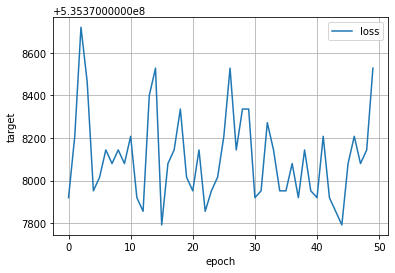

In [23]:
plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('epoch')
plt.ylabel('target')
plt.legend()
plt.grid(True)

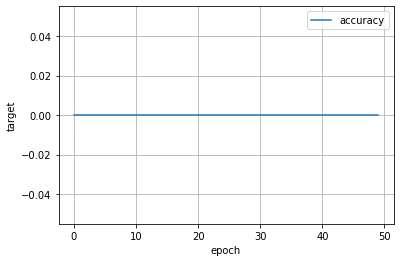

In [24]:
# plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('epoch')
plt.ylabel('target')
plt.legend()
plt.grid(True)

# 6. Make Predictions


In [25]:
# make probability predictions with the model
predictions = model.predict(X)
predictions[:10]

1062/1062 [==============================] - 1s 430us/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [26]:
import numpy as np
preds=predictions.reshape(-1)
np.random.choice(preds, size=10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [27]:
# round predictions 
rounded = [round(x[0]) for x in predictions]
rounded[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [28]:
# make class predictions with the model
predictions = (model.predict(X) > 0.5).astype(int)
predictions[:10]

1062/1062 [==============================] - 1s 462us/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

# 7. Save the model
https://machinelearningmastery.com/save-load-keras-deep-learning-models/

In [29]:
model.save("credit-model-1.h5")

In [30]:
# load model
from keras.models import load_model
model2 = load_model('credit-model-1.h5')

In [31]:
# make class predictions with the model
predictions = (model.predict(X) > 0.5).astype(int)
predictions[:10]

1062/1062 [==============================] - 0s 437us/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])